In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kotsi = pd.read_csv('C:/road_accident_dataset.csv')
kotsi.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [3]:
# Check for missing values

print(kotsi.isnull().sum())

Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int

In [4]:
# Exploring our data

pd.set_option('display.float_format', lambda x: '%.2f' % x)
kotsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

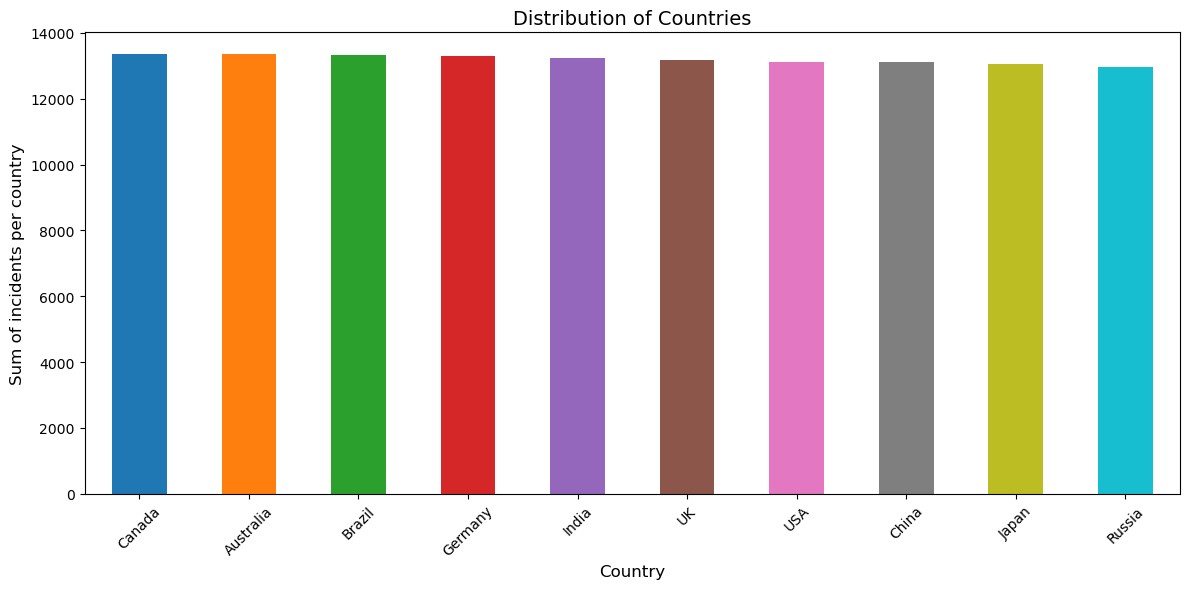

In [5]:
# Distribution by country

count = kotsi['Country'].value_counts()

colors = plt.cm.tab10(range(len(count)))

plt.figure(figsize = (12, 6))  
count.plot(kind = 'bar', color = colors)

plt.xlabel('Country', fontsize = 12)
plt.ylabel('Sum of incidents per country', fontsize = 12)
plt.title('Distribution of Countries', fontsize = 14)
plt.xticks(rotation = 45 )  

plt.tight_layout()
plt.show()

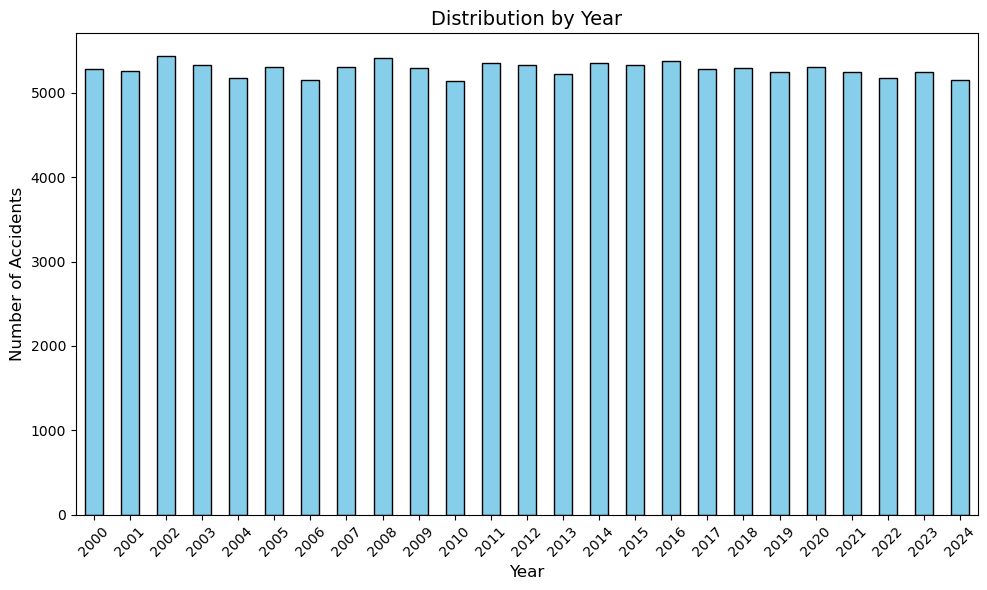

In [6]:
# Distribution by Year


accidents_per_year = kotsi['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))  
accidents_per_year.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution by Year', fontsize = 14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)  # Keep years horizontal for readability

# Show the plot
plt.tight_layout()
plt.show()


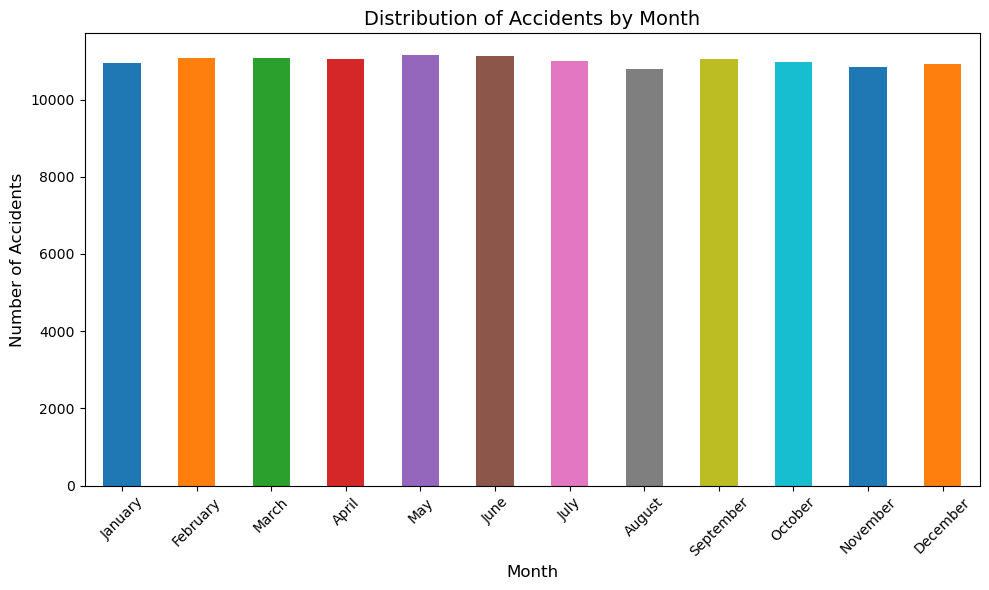

In [7]:
# Distribution by Month

accidents_per_month = kotsi['Month'].value_counts()


calendar_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                  'August', 'September', 'October', 'November', 'December']

accidents_per_month = accidents_per_month.reindex(calendar_order).fillna(0).astype(int)

colors = plt.cm.tab10(range(len(count)))


plt.figure(figsize = (10, 6))  
accidents_per_month.plot(kind = 'bar', color = colors)


plt.title('Distribution of Accidents by Month', fontsize = 14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)  


plt.tight_layout()
plt.show()


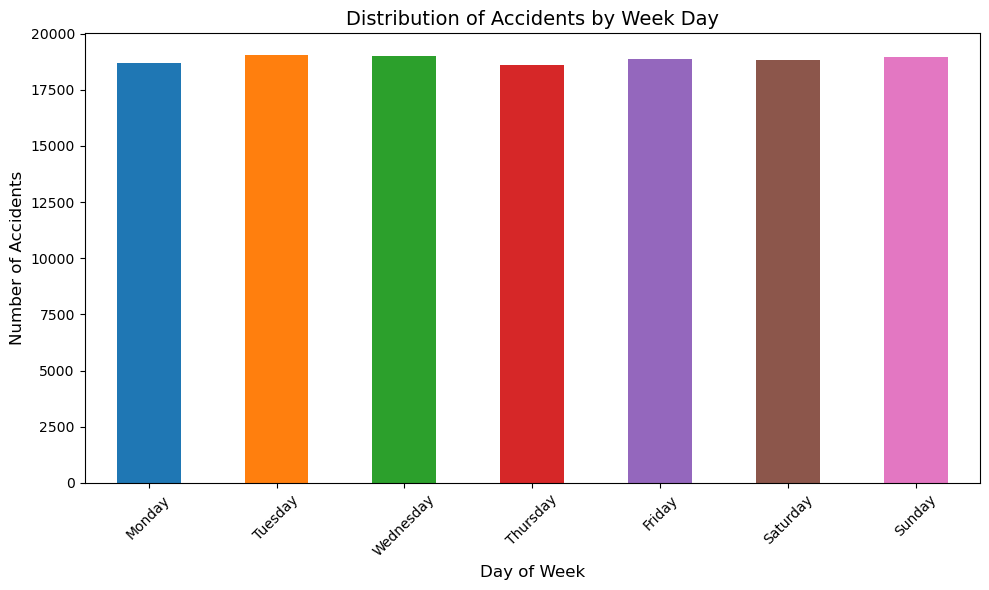

In [8]:
# Distribution by Day of the week

accidents_per_day_week = kotsi['Day of Week'].value_counts()


week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

accidents_per_day_week = accidents_per_day_week.reindex(week_order).fillna(0).astype(int)

colors = plt.cm.tab10(range(len(count)))


plt.figure(figsize = (10, 6))  
accidents_per_day_week.plot(kind = 'bar', color = colors)


plt.title('Distribution of Accidents by Week Day', fontsize = 14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)  


plt.tight_layout()
plt.show()


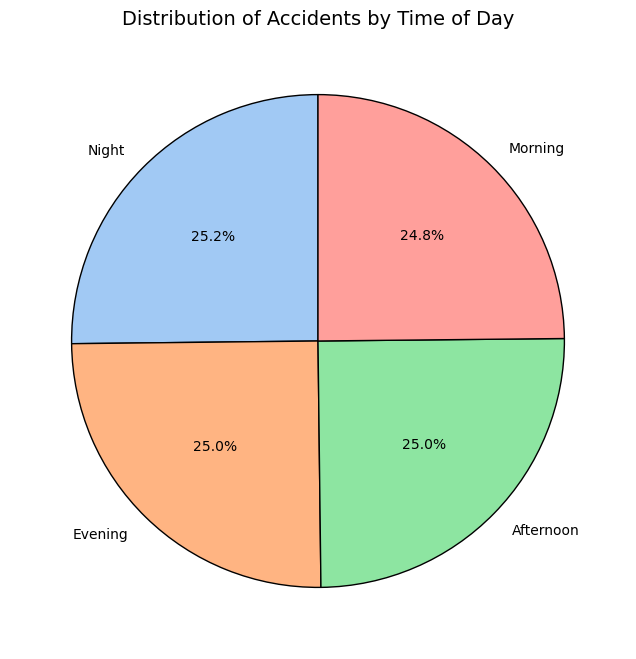

In [9]:
# Distribution by Time of the Day

accidents_per_dayTime = kotsi['Time of Day'].value_counts()
#print(accidents_per_dayTime)


colors = sns.color_palette('pastel', len(accidents_per_dayTime))


plt.figure(figsize = (8, 8))  

plt.pie(
    accidents_per_dayTime, 
    labels = accidents_per_dayTime.index, 
    colors = colors, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'black'}
)


plt.title('Distribution of Accidents by Time of Day', fontsize = 14)

plt.show()


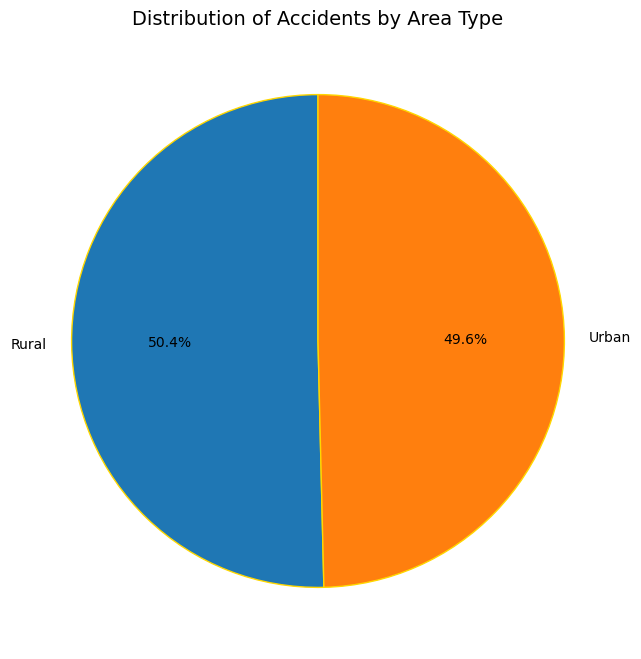

In [10]:
# Distribution by Urban/Rural

accidents_per_area = kotsi['Urban/Rural'].value_counts()


plt.figure(figsize = (8, 8))  

plt.pie(
    accidents_per_area, 
    labels = accidents_per_area.index, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'gold'}
)


plt.title('Distribution of Accidents by Area Type', fontsize = 14)

plt.show()

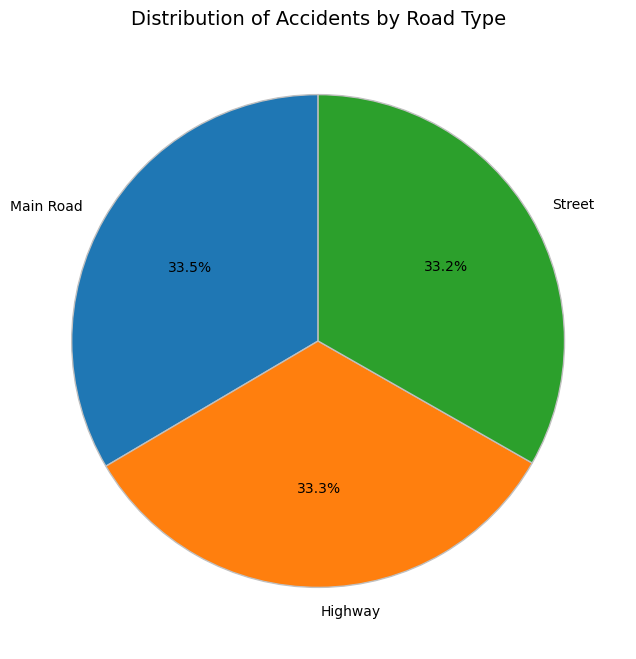

In [11]:
# Distribution by Road Type 

accidents_per_roadType = kotsi['Road Type'].value_counts()


plt.figure(figsize = (8, 8))  

plt.pie(
    accidents_per_roadType , 
    labels = accidents_per_roadType .index, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'silver'}
)


plt.title('Distribution of Accidents by Road Type', fontsize = 14)

plt.show()


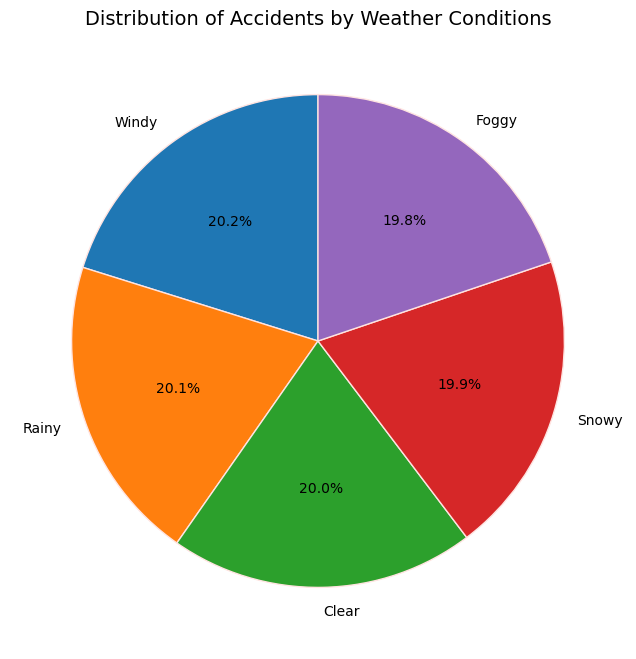

In [12]:
# Distribution by Weather Conditions 

accidents_per_weather = kotsi['Weather Conditions'].value_counts()


plt.figure(figsize = (8, 8))  

plt.pie(
    accidents_per_weather , 
    labels = accidents_per_weather .index, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'mistyrose'}
)


plt.title('Distribution of Accidents by Weather Conditions', fontsize = 14)

plt.show()


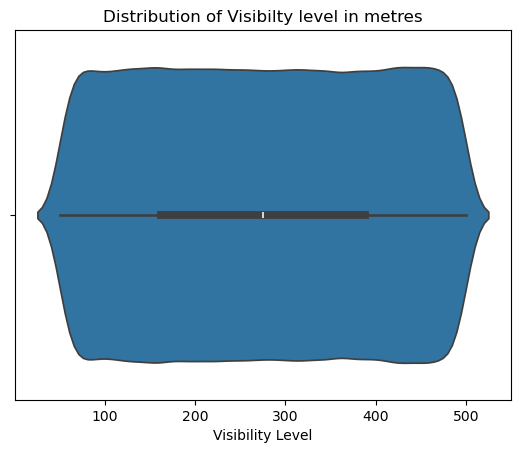

In [13]:
# Distribution by Visibility Level vs Weather Conditions

sns.violinplot( x = kotsi['Visibility Level'])
plt.title('Distribution of Visibilty level in metres')
plt.show()

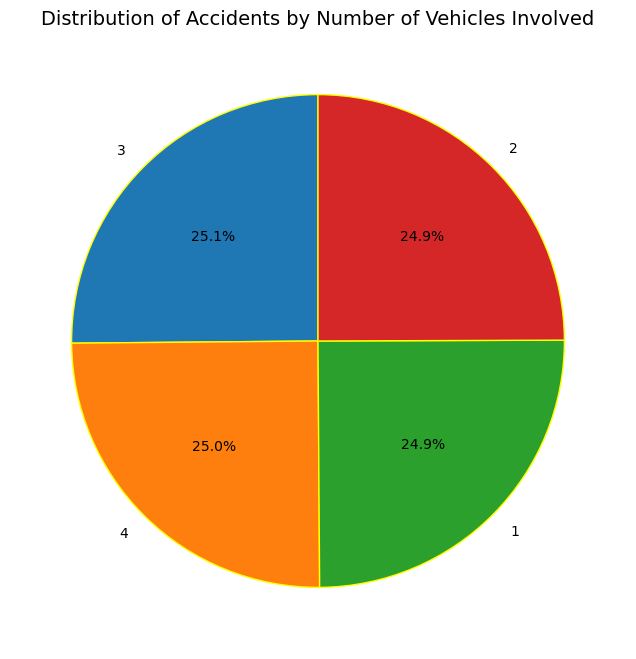

In [14]:
# Distribution by Number of Vehicles Involved

accidents_per_roadType = kotsi['Number of Vehicles Involved'].value_counts()


plt.figure(figsize = (8, 8))  

plt.pie(
    accidents_per_roadType , 
    labels = accidents_per_roadType .index, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'yellow'}
)


plt.title('Distribution of Accidents by Number of Vehicles Involved', fontsize = 14)

plt.show()


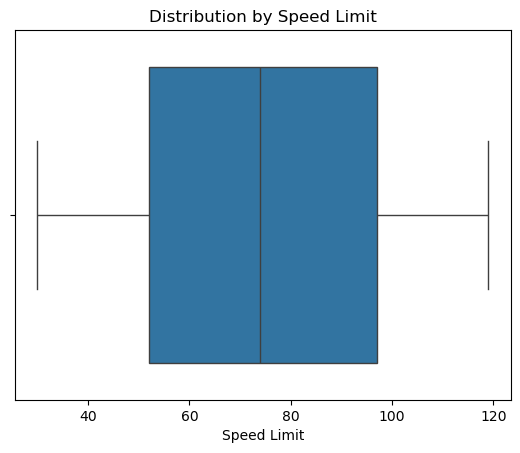

In [15]:
# Distribution by Speed Limit

sns.boxplot(x = kotsi['Speed Limit'])
plt.title('Distribution by Speed Limit')
plt.show()



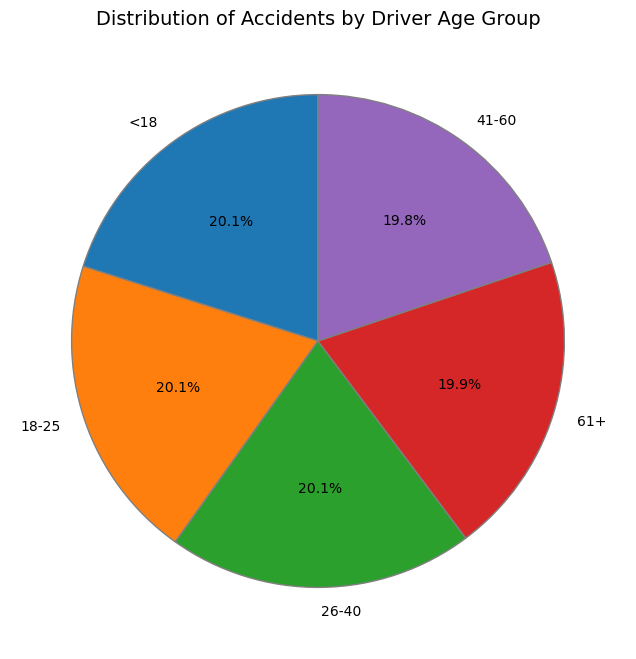

In [16]:
# Distribution by Driver Age Group

driver_age_group = kotsi['Driver Age Group'].value_counts()


plt.figure(figsize = (8, 8))  

plt.pie(
    driver_age_group , 
    labels = driver_age_group.index, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'grey'}
)


plt.title('Distribution of Accidents by Driver Age Group', fontsize = 14)

plt.show()



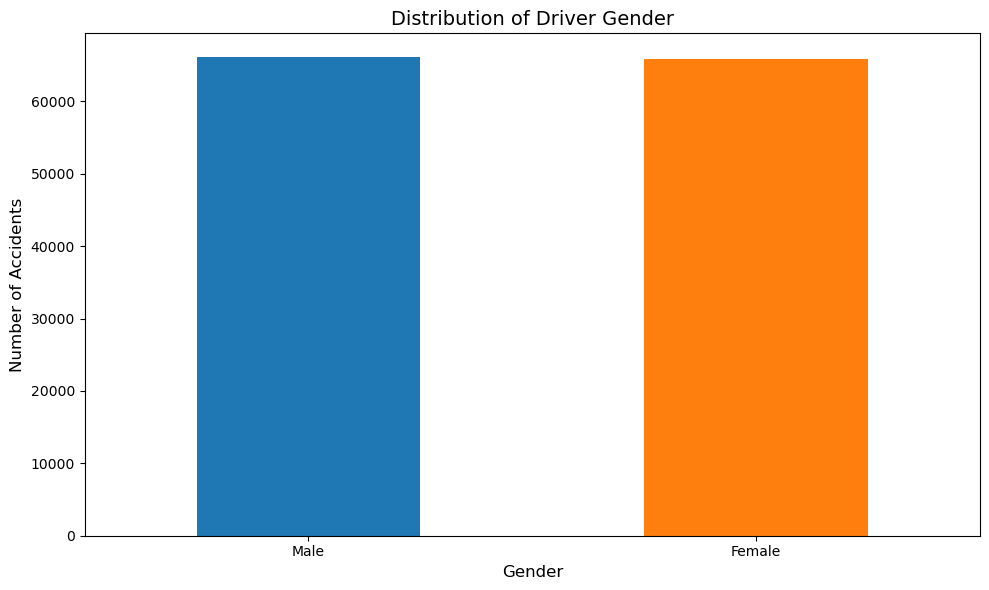

In [17]:
# Distribution by Driver Gender

gender = kotsi['Driver Gender'].value_counts()


colors = plt.cm.tab10(range(len(count)))


plt.figure(figsize = (10, 6))  
gender.plot(kind = 'bar', color = colors)


plt.title('Distribution of Driver Gender', fontsize = 14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 0, fontsize = 10)  


plt.tight_layout()
plt.show()

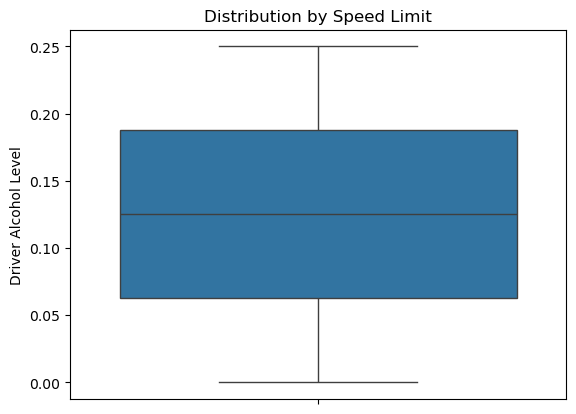

In [18]:
# Distribution by Driver Alcohol Level

sns.boxplot(y = kotsi['Driver Alcohol Level'])
plt.title('Distribution by Speed Limit')
plt.show()



Text(0.5, 1.0, 'Distribution of Accidents by Driver Fatigue')

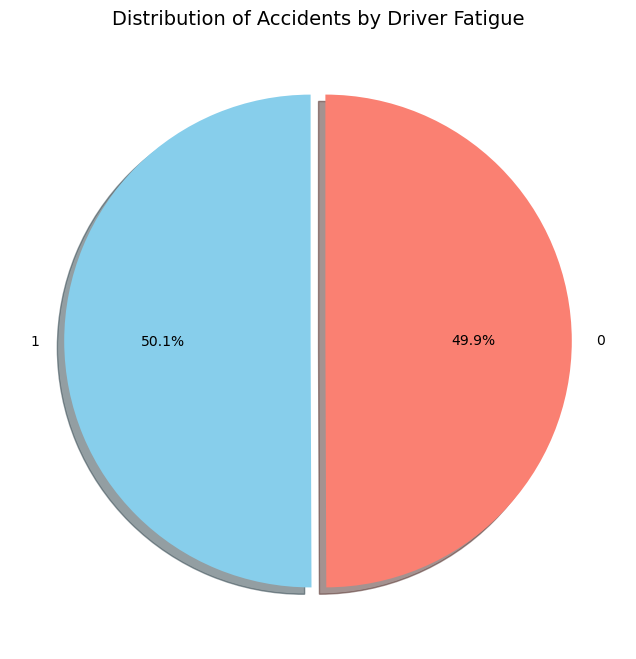

In [19]:
# Distribution by Driver Fatigue

fatigue = kotsi['Driver Fatigue'].value_counts()

colors = ['skyblue', 'salmon']
explode = (0.03, 0.03)

plt.figure(figsize = (8, 8))  

plt.pie(
    fatigue , 
    labels = fatigue.index, 
    autopct = '%1.1f%%', 
    colors = colors,
    explode = explode,
    shadow = True,
    startangle = 90
)

plt.title('Distribution of Accidents by Driver Fatigue', fontsize = 14)



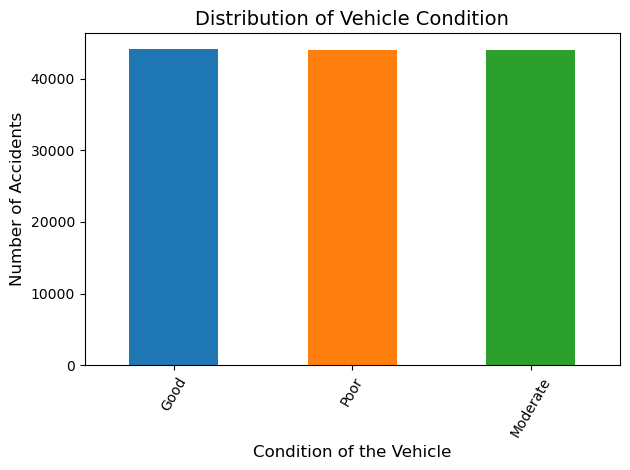

In [20]:
# Distribution by Vehicle Condition

cond = kotsi['Vehicle Condition'].value_counts()


colors = plt.cm.tab10(range(len(count)))


cond.plot(kind = 'bar', color = colors)


plt.title('Distribution of Vehicle Condition', fontsize = 14)
plt.xlabel('Condition of the Vehicle', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 60, fontsize = 10)  


plt.tight_layout()
plt.show()



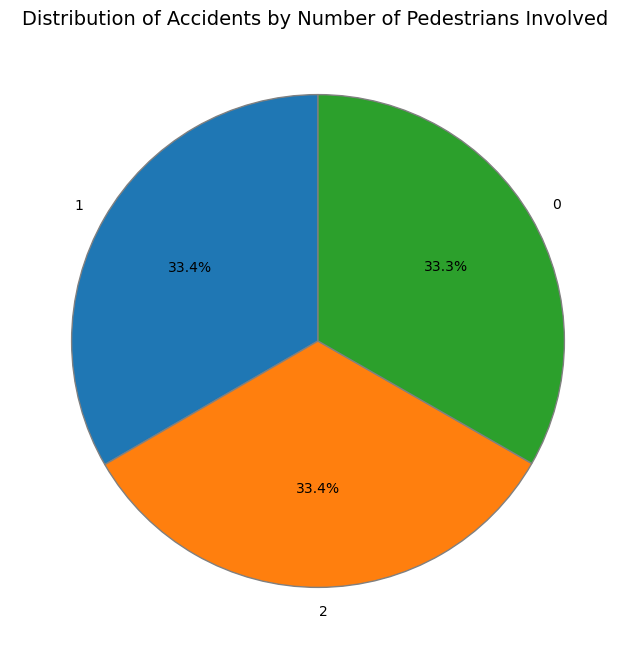

In [21]:
# Distribution by Pedestrians Involved 

pedes = kotsi['Pedestrians Involved'].value_counts()

plt.figure(figsize = (8, 8))  

plt.pie(
    pedes , 
    labels = pedes.index, 
    autopct = '%1.1f%%', 
    startangle = 90, 
    wedgeprops = {'edgecolor': 'grey'}
)


plt.title('Distribution of Accidents by Number of Pedestrians Involved ', fontsize = 14)

plt.show()


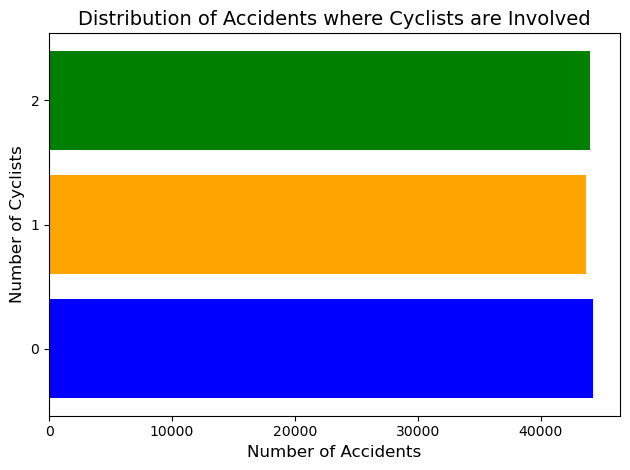

In [22]:
# Distribution by Cyclists Involved

bikers = kotsi['Cyclists Involved'].value_counts().sort_index()  

plt.barh(bikers.index.astype(str), bikers.values, color=['blue', 'orange', 'green'])


plt.title('Distribution of Accidents where Cyclists are Involved', fontsize = 14)
plt.xlabel('Number of Accidents', fontsize = 12)
plt.ylabel('Number of Cyclists', fontsize = 12)
plt.xticks(rotation = 0, fontsize = 10)  

plt.tight_layout()
plt.show()


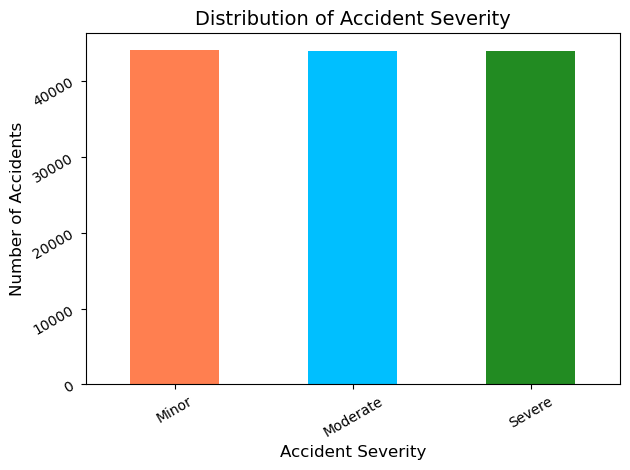

In [23]:
# Distribution by Accident Severity

serv = kotsi['Accident Severity'].value_counts().sort_index() 

colors = ['coral', 'deepskyblue', 'forestgreen']

serv.plot(kind = 'bar', color = colors)

plt.title('Distribution of Accident Severity', fontsize = 14)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 30, fontsize = 10)  
plt.yticks(rotation = 30, fontsize = 10)

plt.tight_layout()
plt.show()


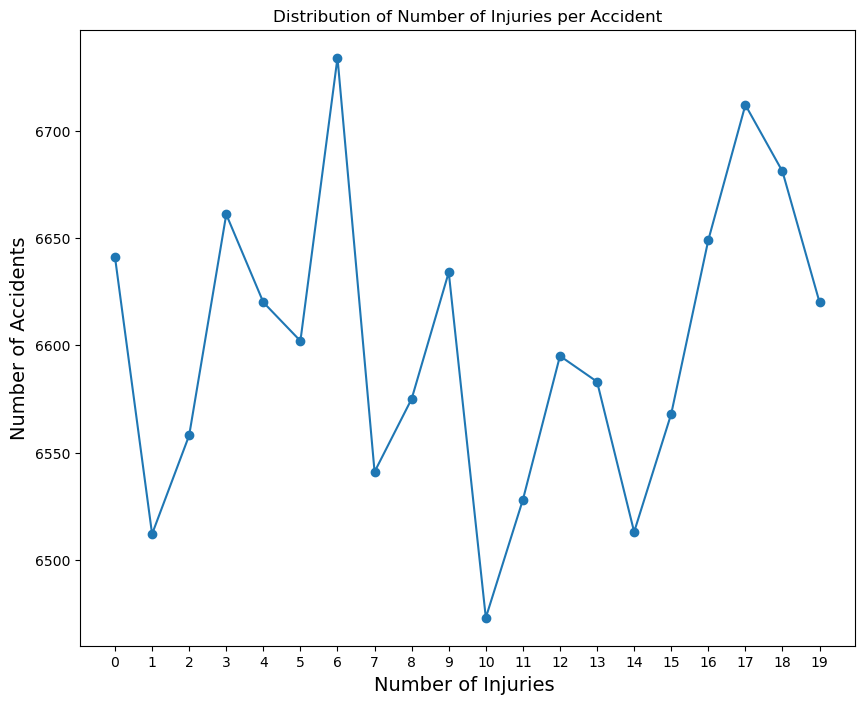

In [24]:
# Distribution by Number of Injuries 

inj = kotsi['Number of Injuries'].value_counts().sort_index() 


all_cat = pd.Series(index = range(20), data = 0)
inj = all_cat.add(inj, fill_value = 0)

plt.figure(figsize=(10, 8))

plt.plot(inj.index, inj.values, marker='o')



plt.title('Distribution of Number of Injuries per Accident')
plt.xlabel('Number of Injuries ', fontsize = 14)
plt.ylabel('Number of Accidents', fontsize = 14)
plt.xticks(range(20))

plt.show()


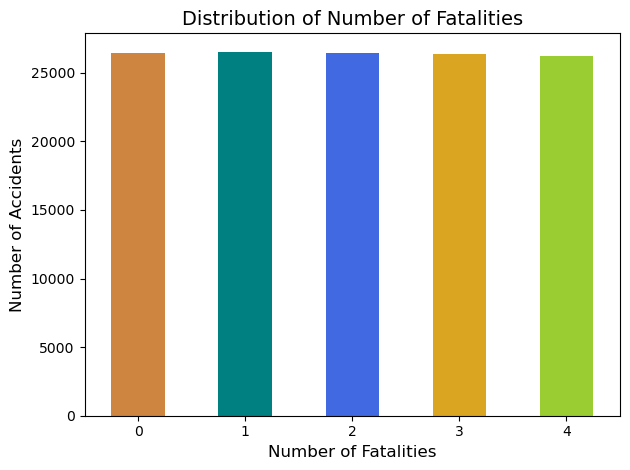

In [25]:
# Distribution of Number of Fatalities

ita = kotsi['Number of Fatalities'].value_counts().sort_index()

colors = ['peru', 'teal', 'royalblue', 'goldenrod','yellowgreen']

ita.plot(kind = 'bar', color = colors)

plt.title('Distribution of Number of Fatalities', fontsize = 14)
plt.xlabel('Number of Fatalities', fontsize=12)
plt.ylabel('Number of Accidents', fontsize = 12)
plt.xticks(rotation = 0, fontsize = 10)  
plt.yticks(rotation = 0, fontsize = 10)

plt.tight_layout()
plt.show()


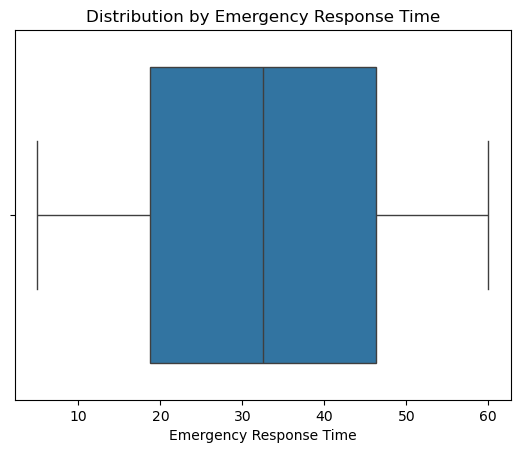

In [26]:
# Distribution by Emergency Response Time

sns.boxplot(x = kotsi['Emergency Response Time'])
plt.title('Distribution by Emergency Response Time')
plt.show()

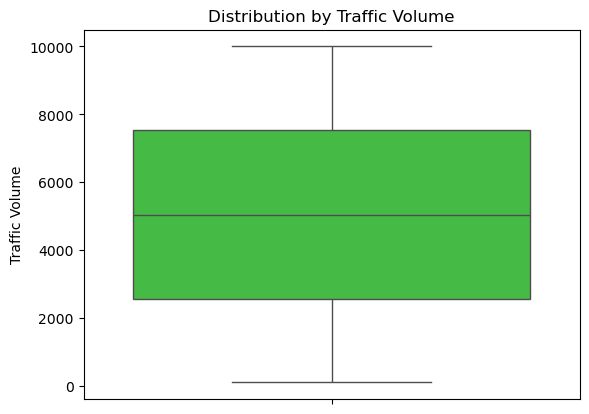

In [27]:
# Distribution by Traffic Volume

sns.boxplot(y = kotsi['Traffic Volume'], color = 'limegreen')
plt.title('Distribution by Traffic Volume')
plt.show()

Text(0.5, 1.0, 'Distribution of Accidents by Road Condition')

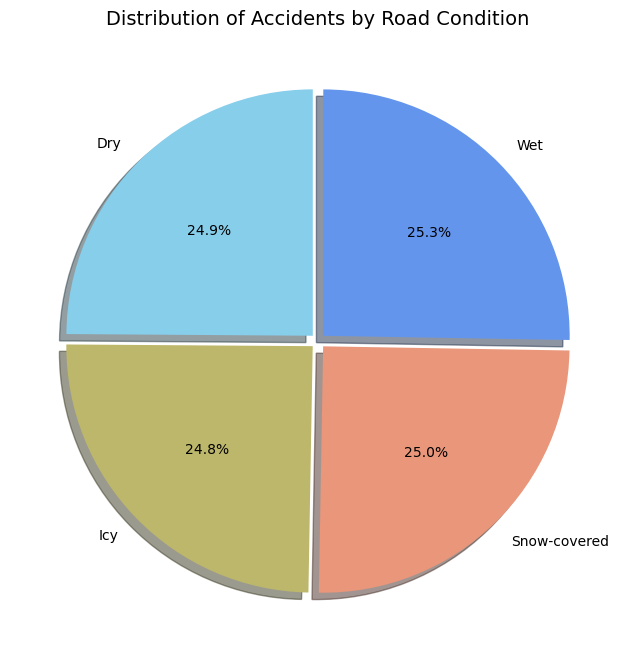

In [28]:
# Distribution by Road Condition

rc = kotsi['Road Condition'].value_counts().sort_index()

colors = ['skyblue', 'darkkhaki','darksalmon','cornflowerblue']
explode = (0.03, 0.03, 0.03,0.03)

plt.figure(figsize = (8, 8))  

plt.pie(
    rc , 
    labels = rc.index, 
    autopct = '%1.1f%%', 
    colors = colors,
    explode = explode,
    shadow = True,
    startangle = 90
)

plt.title('Distribution of Accidents by Road Condition', fontsize = 14)



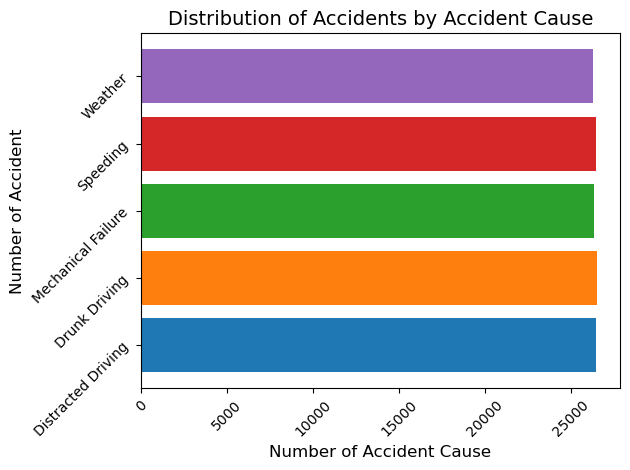

In [29]:
# Distribution by Accident Cause

ac = kotsi['Accident Cause'].value_counts().sort_index() 

plt.barh(ac.index.astype(str), ac.values, color = plt.cm.tab10(range(len(count))))


plt.title('Distribution of Accidents by Accident Cause', fontsize = 14)
plt.xlabel('Number of Accident Cause', fontsize = 12)
plt.ylabel('Number of Accident', fontsize = 12)
plt.yticks(rotation = 45, fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)  

plt.tight_layout()
plt.show()


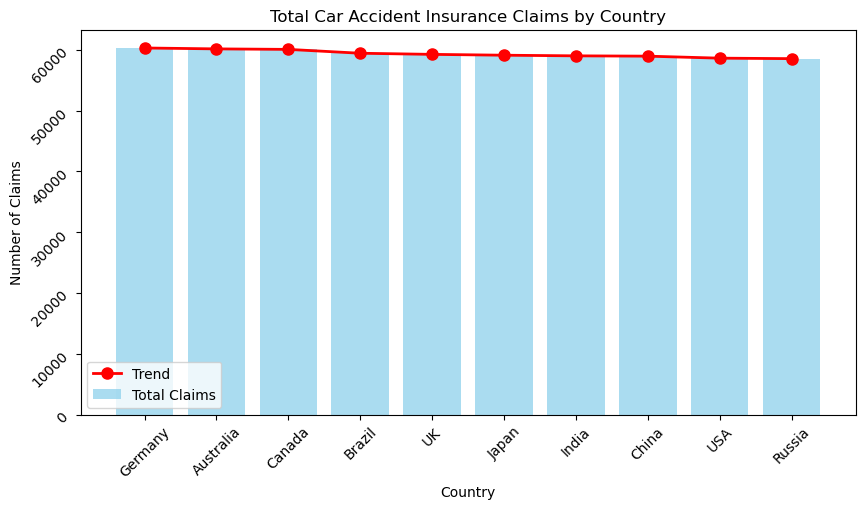

In [30]:
# Distribution of Insurance Claims per country

# Sum claims per country and sort in ascending order
claims_per_country = kotsi.groupby('Country')['Insurance Claims'].sum()
claims_per_country = claims_per_country.sort_values(ascending = False)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart
ax1.bar(claims_per_country.index, claims_per_country.values, color = 'skyblue', alpha = 0.7, label = 'Total Claims')

# Line plot
ax1.plot(claims_per_country.index, claims_per_country.values, color = 'red', marker='o', linestyle = '-', linewidth = 2, markersize = 8, label = 'Trend')


ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Claims')
ax1.set_title('Total Car Accident Insurance Claims by Country')
plt.yticks(rotation = 45, fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10) 
ax1.legend()

plt.show()


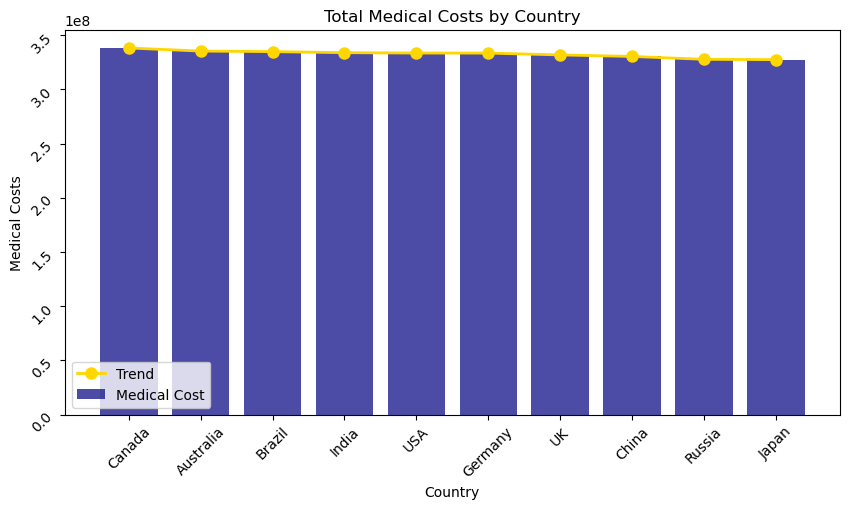

In [31]:
# Distribution of Medical Costs per country

# Sum Medical Costs per country and sort in ascending order
claims_per_country = kotsi.groupby('Country')['Medical Cost'].sum()
claims_per_country = claims_per_country.sort_values(ascending = False)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart
ax1.bar(claims_per_country.index, claims_per_country.values, color = 'navy', alpha = 0.7, label = 'Medical Cost')

# Line plot
ax1.plot(claims_per_country.index, claims_per_country.values, color = 'gold', marker='o', linestyle = '-', linewidth = 2, markersize = 8, label = 'Trend')


ax1.set_xlabel('Country')
ax1.set_ylabel('Medical Costs')
ax1.set_title('Total Medical Costs by Country')
plt.yticks(rotation = 45, fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10) 
ax1.legend()

plt.show()



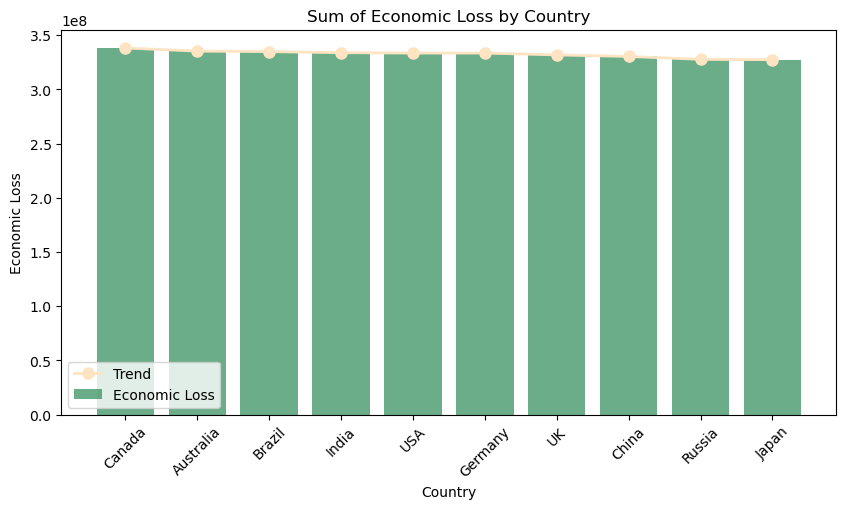

In [32]:
# Distribution of Economic Loss

# Sum Economic Loss per country and sort in ascending order
ecos_country = kotsi.groupby('Country')['Economic Loss'].sum()
ecos_country = claims_per_country.sort_values(ascending = False)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart
ax1.bar(ecos_country.index, ecos_country.values, color = 'seagreen', alpha = 0.7, label = 'Economic Loss')

# Line plot
ax1.plot(ecos_country.index, ecos_country.values, color = 'bisque', marker='o', linestyle = '-', linewidth = 2, markersize = 8, label = 'Trend')


ax1.set_xlabel('Country')
ax1.set_ylabel('Economic Loss')
ax1.set_title('Sum of Economic Loss by Country')
plt.yticks(rotation = 0, fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10) 
ax1.legend()

plt.show()


Text(0.5, 1.0, 'Distribution of Accidents by Region')

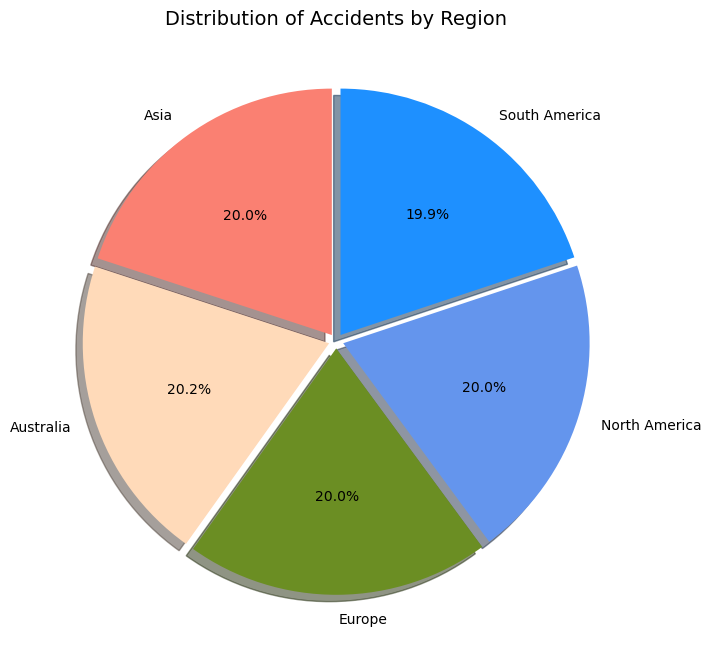

In [33]:
# Distribution of Region

region = kotsi['Region'].value_counts().sort_index()

colors = ['salmon', 'peachpuff','olivedrab','cornflowerblue','dodgerblue']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)

plt.figure(figsize = (8, 8))  

plt.pie(
    region , 
    labels = region.index, 
    autopct = '%1.1f%%', 
    colors = colors,
    explode = explode,
    shadow = True,
    startangle = 90
)

plt.title('Distribution of Accidents by Region', fontsize = 14)


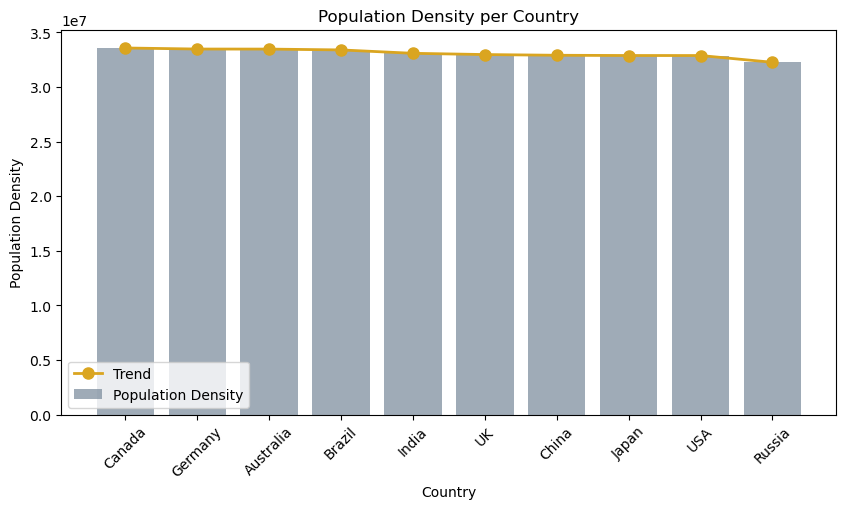

In [34]:
# Distribution Population Density

# Sum Population Density per country and sort in ascending order
pop_country = kotsi.groupby('Country')['Population Density'].sum()
pop_country = pop_country.sort_values(ascending = False)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart
ax1.bar(pop_country.index, pop_country.values, color = 'lightslategrey', alpha = 0.7, label = 'Population Density')

# Line plot
ax1.plot(pop_country.index, pop_country.values, color = 'goldenrod', marker='o', linestyle = '-', linewidth = 2, markersize = 8, label = 'Trend')


ax1.set_xlabel('Country')
ax1.set_ylabel('Population Density')
ax1.set_title('Population Density per Country')
plt.yticks(rotation = 0, fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10) 
ax1.legend()

plt.show()


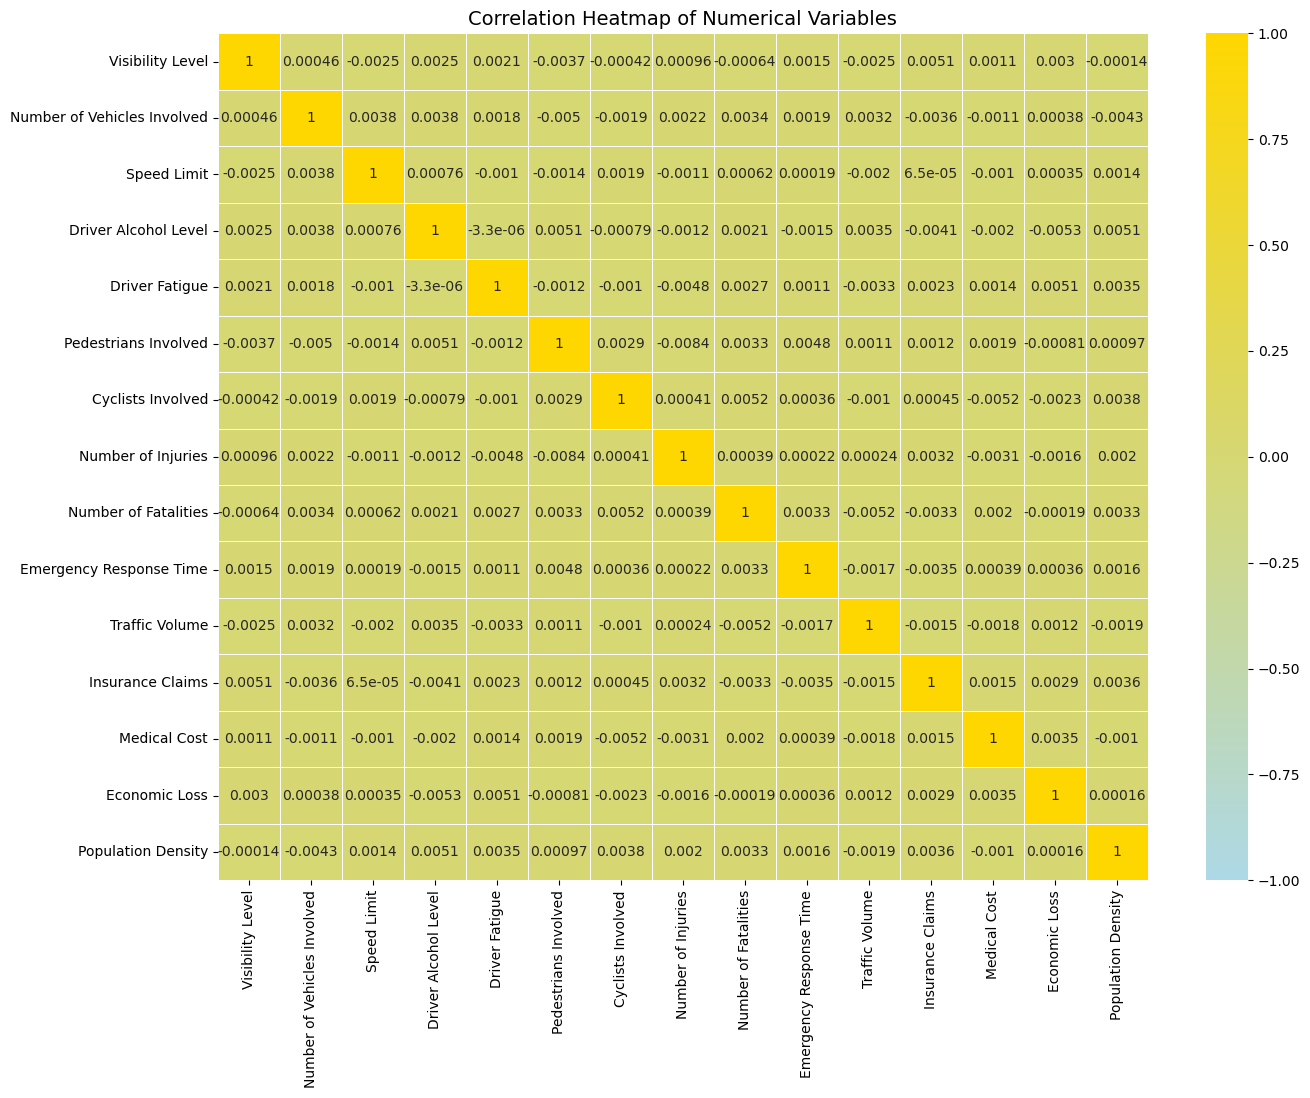

In [35]:
# Correlation matrix between numerical variables

import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list( 'custom_cmap', ['lightblue', 'gold'] )

# Select numerical variables
enc = kotsi.drop( columns =['Country','Year','Month','Day of Week','Time of Day','Urban/Rural',
                 'Road Type','Weather Conditions','Driver Age Group','Driver Gender','Vehicle Condition',
                 'Accident Severity','Road Condition','Accident Cause' ,'Region'])

# Compute the correlation matrix
corr_matrix = enc.corr()

# Plot the heatmap
plt.figure(figsize = (15, 11))
sns.heatmap(corr_matrix, annot = True, cmap = cmap, linewidths = 0.5 , vmin = -1, vmax = 1)
plt.title('Correlation Heatmap of Numerical Variables', fontsize = 14)
plt.show()